# What are the main drivers of the level of damage ? 

The goal of this part is to determine which variable explains the level of damage as an output of the damage function. To do so, we will proceed to an econometric regression of the level of damage by other explanatory variables. 

The general idea is that the quantitative level of damage given by the model is driven by multiple factors : 

- physical drivers, such as the level of climate change (temperature change, radiative forcing, etc.)
- methodological drivers, such as the choice of this or that modelling choice
- ethical drivers, such as the way spatial, social or generational equities are represented

In order to quantitatively assess the role of each factor in the model, we will perform linear regressions, in which the level of damage is assumed to be explained by a set of explanatory variables. These explanatory variables have been choosen or designed to be representative of one of the above mentionned choices. 

The general form is the following : 

$$


\begin{align*}
\text{damage} = & \ \beta_0  + \underbrace{\beta_1 \cdot \text{temperature} + \beta_2 \cdot \text{radiative forcing}}_\text{Physical variables}  + \underbrace{\beta_3 \cdot \text{equation}}_\text{Methodological variables} \\
& + \underbrace{\beta_1 \cdot \text{exponent} + \beta_2 \cdot \text{normalisation constant} + \beta_2 \cdot \text{discount rate} + \beta_2 \cdot \text{social parameter}}_\text{Ethical variables}  + \epsilon
\end{align*}

$$

where:
- $\text{damage}$ is the level of damage
- $\beta_0$ is the intercept term
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the variables
- $\text{exponent}, \text{normalisation constant}, \ldots, \text{temperature}$ are the independent variables
- $\epsilon$ is the error term


The form of the damage functions in the model is : 

$$

D_{t,r} = f(\text{temperature}, \text{other drivers})_{t,r} \cdot GDP_{t,r} \cdot (\frac{y_{t,r}}{y_0})^\beta

$$

### Preparation of the data

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [2]:
# This cell stores the variables for the rest of the script, so it is easier to change if needed
data_file_path = '../../../results/batch/run_ds_17_07_2.nc'

First, we have to load the data that came as an output of the model. Variables of interest are stored in a netcdf file (.nc), that we will load as a dataset, and convert to a pandas dataframe. 

In [3]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'time',
       'temperature_change', 'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'extra_extra_gdp_modifyer',
       'total_radiative_forcing', 
       'gross_domestic_product_nominal', 'population_35_regions', 
       'average_disposable_income_per_capita']

damage_variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_total_damage',
       'fund_tot_eq_fund_total_impact', 'witness_tot_eq_witness_total_impact']      

ds = xr.open_dataset(data_file_path)
df = ds[variables].to_dataframe().reset_index()

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


We now have a dataframe : 

In [4]:
df

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,extra_extra_gdp_modifyer,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,average_disposable_income_per_capita
0,0,2005.0,AUSTRIA,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,0.000000e+00,0.845000,6.541007e+09,0.673154,33719.963728,0.000000,1.714491,3.786850e+05,8.253656e+06,0.000000
1,0,2005.0,BELGIUM,9.073872e+02,1.096125e+03,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,1.852103e+03,0.845000,6.541007e+09,0.673154,33719.963728,0.966607,1.714491,4.580816e+05,1.054688e+07,24767.399895
2,0,2005.0,BULGARIA,8.949953e+01,1.081156e+02,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,1.826809e+02,0.845000,6.541007e+09,0.673154,33719.963728,0.885123,1.714491,4.934207e+04,7.686964e+06,4290.060541
3,0,2005.0,CROATIA,9.215513e+01,1.113236e+02,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,1.881014e+02,0.845000,6.541007e+09,0.673154,33719.963728,0.910710,1.714491,4.937873e+04,4.378066e+06,7565.730576
4,0,2005.0,CYPRUS,3.914559e+01,4.728794e+01,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,7.990157e+01,0.845000,6.541007e+09,0.673154,33719.963728,0.943245,1.714491,2.025158e+04,1.027657e+06,15217.411656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1,2050.0,INDIA,1.093989e+04,7.720233e+03,0.0,1.033936e+10,2.610737e+04,1.033936e+10,1.676094e+05,1.334615e+04,2.002517,8.633636e+09,-0.187013,29696.100321,0.222975,3.804644,2.490399e+06,1.575712e+09,684.042724
3216,1,2050.0,LATAM,8.988542e+04,6.343176e+04,0.0,3.080282e+10,4.219087e+03,3.080282e+10,2.094437e+06,1.096560e+05,2.002517,8.633636e+09,-0.187013,29696.100321,0.658689,3.804644,6.926603e+06,4.072643e+08,10374.123797
3217,1,2050.0,RUSSIA,1.558682e+05,1.099955e+05,0.0,2.248643e+10,8.288707e+02,2.248643e+10,7.054126e+06,1.901518e+05,2.002517,8.633636e+09,-0.187013,29696.100321,1.070502,3.804644,7.390629e+06,1.411250e+08,35105.387595
3218,1,2050.0,USMCA,1.439973e+06,1.016183e+06,0.0,1.014323e+11,4.586604e+03,1.014323e+11,1.357162e+07,1.756699e+06,2.002517,8.633636e+09,-0.187013,29696.100321,1.387557,3.804644,5.267627e+07,4.965688e+08,67326.031885


### Cleaning the dataset from coef outliers

We now compute the spatial equity coefficient, which takes the form : 

$$ \text{coef} = (\frac{y_{t,r}}{y_0})^\beta $$

In [5]:
#df['coef'] = ((df['gross_domestic_product_nominal']/df['population_35_regions'] )/ df['extra_extra_normalisation_constant'] ) ** df['extra_extra_exponent']
#df['coef'] = np.random.normal(0, 2, df.shape[0])
#df['coef'] = ((df['average_disposable_income_per_capita'])/ df['extra_extra_normalisation_constant'] ) ** df['extra_extra_exponent']
df['coef'] = df['extra_extra_gdp_modifyer']
df.drop(columns=['extra_extra_gdp_modifyer'], inplace=True)
df

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,average_disposable_income_per_capita,coef
0,0,2005.0,AUSTRIA,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,0.000000e+00,0.845000,6.541007e+09,0.673154,33719.963728,1.714491,3.786850e+05,8.253656e+06,0.000000,0.000000
1,0,2005.0,BELGIUM,9.073872e+02,1.096125e+03,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,1.852103e+03,0.845000,6.541007e+09,0.673154,33719.963728,1.714491,4.580816e+05,1.054688e+07,24767.399895,0.966607
2,0,2005.0,BULGARIA,8.949953e+01,1.081156e+02,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,1.826809e+02,0.845000,6.541007e+09,0.673154,33719.963728,1.714491,4.934207e+04,7.686964e+06,4290.060541,0.885123
3,0,2005.0,CROATIA,9.215513e+01,1.113236e+02,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,1.881014e+02,0.845000,6.541007e+09,0.673154,33719.963728,1.714491,4.937873e+04,4.378066e+06,7565.730576,0.910710
4,0,2005.0,CYPRUS,3.914559e+01,4.728794e+01,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,7.990157e+01,0.845000,6.541007e+09,0.673154,33719.963728,1.714491,2.025158e+04,1.027657e+06,15217.411656,0.943245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1,2050.0,INDIA,1.093989e+04,7.720233e+03,0.0,1.033936e+10,2.610737e+04,1.033936e+10,1.676094e+05,1.334615e+04,2.002517,8.633636e+09,-0.187013,29696.100321,3.804644,2.490399e+06,1.575712e+09,684.042724,0.222975
3216,1,2050.0,LATAM,8.988542e+04,6.343176e+04,0.0,3.080282e+10,4.219087e+03,3.080282e+10,2.094437e+06,1.096560e+05,2.002517,8.633636e+09,-0.187013,29696.100321,3.804644,6.926603e+06,4.072643e+08,10374.123797,0.658689
3217,1,2050.0,RUSSIA,1.558682e+05,1.099955e+05,0.0,2.248643e+10,8.288707e+02,2.248643e+10,7.054126e+06,1.901518e+05,2.002517,8.633636e+09,-0.187013,29696.100321,3.804644,7.390629e+06,1.411250e+08,35105.387595,1.070502
3218,1,2050.0,USMCA,1.439973e+06,1.016183e+06,0.0,1.014323e+11,4.586604e+03,1.014323e+11,1.357162e+07,1.756699e+06,2.002517,8.633636e+09,-0.187013,29696.100321,3.804644,5.267627e+07,4.965688e+08,67326.031885,1.387557


c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


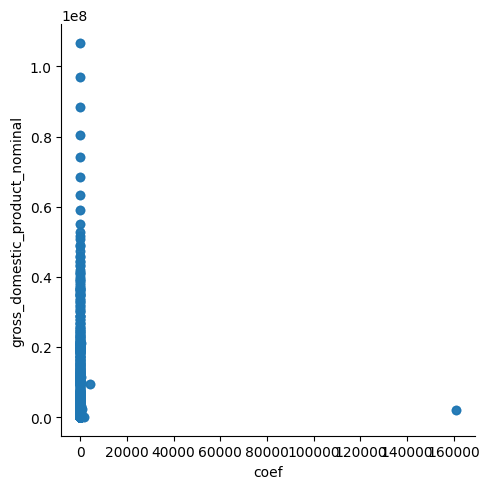

In [6]:
sns.lmplot(data=df, x='coef', y='gross_domestic_product_nominal')

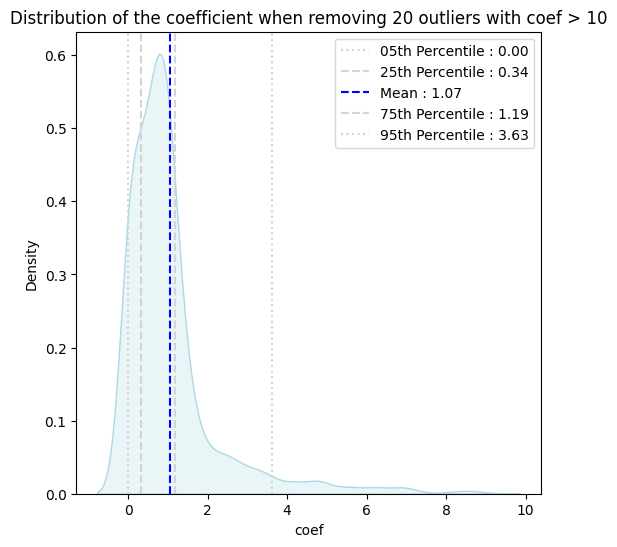

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

coef_threshold = 10
df_outliers = df[df['coef'] > coef_threshold]
df = df[df['coef'] < coef_threshold]
sns.kdeplot(data=df, x='coef', ax=ax, color='lightblue', fill=True)

plt.axvline(df['coef'].quantile(0.05), color='lightgrey', linestyle='dotted', label=f'05th Percentile : {df["coef"].quantile(0.05):.2f}')
plt.axvline(df['coef'].quantile(0.25), color='lightgrey', linestyle='--', label=f'25th Percentile : {df["coef"].quantile(0.25):.2f}')
plt.axvline(df['coef'].mean(), color='blue', linestyle='--', label=f'Mean : {df["coef"].mean():.2f}')
plt.axvline(df['coef'].quantile(0.75), color='lightgrey', linestyle='--', label=f'75th Percentile : {df["coef"].quantile(0.75):.2f}')
plt.axvline(df['coef'].quantile(0.95), color='lightgrey', linestyle='dotted', label=f'95th Percentile : {df["coef"].quantile(0.95):.2f}')



plt.title(f'Distribution of the coefficient when removing {df_outliers.shape[1]} outliers with coef > {coef_threshold}')
plt.legend()
plt.show()

We need to have all the damages in the same column to process to the regression : 

In [8]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'coef'], var_name='equation',  value_vars=damage_variables, value_name='total_damage')

# Removing outliers equations 
df_melted = df_melted[~df_melted['equation'].isin(['fund_tot_total_damage', 'fund_tot_eq_fund_total_impact', 'fund_tot_eq_monetary_impact', 'dsk_tot_eq_dsk_total_impact'])] 

# Drop infinite values
infinites = df_melted[(df_melted['total_damage'] == np.inf) | (df_melted['total_damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)

df_melted


,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,equation,total_damage
0,2005.0,AUSTRIA,0.673154,33719.963728,1.714491,0.000000,define_tot_eq_define_total_impact,0.000000e+00
1,2005.0,BELGIUM,0.673154,33719.963728,1.714491,0.966607,define_tot_eq_define_total_impact,9.073872e+02
2,2005.0,BULGARIA,0.673154,33719.963728,1.714491,0.885123,define_tot_eq_define_total_impact,8.949953e+01
3,2005.0,CROATIA,0.673154,33719.963728,1.714491,0.910710,define_tot_eq_define_total_impact,9.215513e+01
4,2005.0,CYPRUS,0.673154,33719.963728,1.714491,0.943245,define_tot_eq_define_total_impact,3.914559e+01
...,...,...,...,...,...,...,...,...
20309,2050.0,INDIA,-0.187013,29696.100321,3.804644,0.222975,witness_tot_eq_witness_total_impact,1.334615e+04
20310,2050.0,LATAM,-0.187013,29696.100321,3.804644,0.658689,witness_tot_eq_witness_total_impact,1.096560e+05
20311,2050.0,RUSSIA,-0.187013,29696.100321,3.804644,1.070502,witness_tot_eq_witness_total_impact,1.901518e+05
20312,2050.0,USMCA,-0.187013,29696.100321,3.804644,1.387557,witness_tot_eq_witness_total_impact,1.756699e+06


In [9]:
df_2016 = df_melted[df_melted['time'] == 2015]
df_2016

,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,equation,total_damage
338,2015.0,BELGIUM,-1.328286,16177.324541,2.117411,6.147740,define_tot_eq_define_total_impact,9115.639839
339,2015.0,DENMARK,-1.328286,16177.324541,2.117411,4.122465,define_tot_eq_define_total_impact,3958.045437
340,2015.0,FINLAND,-1.328286,16177.324541,2.117411,5.658625,define_tot_eq_define_total_impact,4223.865783
341,2015.0,FRANCE,-1.328286,16177.324541,2.117411,6.627621,define_tot_eq_define_total_impact,52086.626563
342,2015.0,GERMANY,-1.328286,16177.324541,2.117411,5.365057,define_tot_eq_define_total_impact,58827.634620
343,2015.0,IRELAND,-1.328286,16177.324541,2.117411,4.758600,define_tot_eq_define_total_impact,4286.903059
344,2015.0,LUXEMBOURG,-1.328286,16177.324541,2.117411,0.644143,define_tot_eq_define_total_impact,119.077539
345,2015.0,SWEDEN,-1.328286,16177.324541,2.117411,5.133872,define_tot_eq_define_total_impact,8246.752129
346,2015.0,UK,-1.328286,16177.324541,2.117411,2.921845,define_tot_eq_define_total_impact,27483.303482
347,2015.0,USMCA,-1.328286,16177.324541,2.117411,3.015916,define_tot_eq_define_total_impact,204149.920356


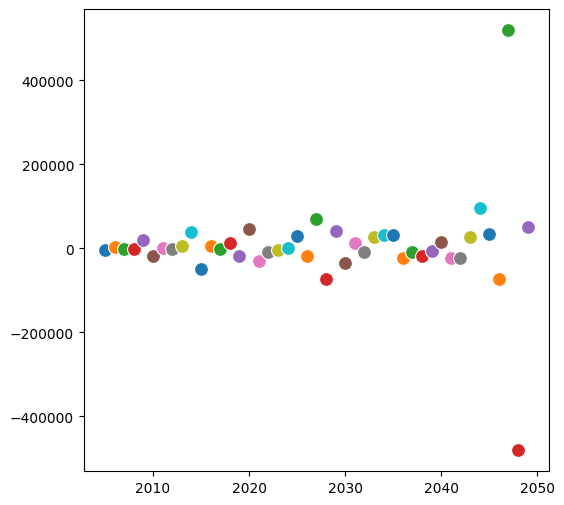

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

for year in range(2005, 2050):

    dif = df_melted.loc[df_melted['time'] == year+1, 'total_damage'].mean() - df_melted.loc[df_melted['time'] == year, 'total_damage'].mean()
    sns.scatterplot(x=[year], y=[dif], ax=ax, s=100, label=f'{year} - {year+1}', legend=False)



plt.show()

Since there is obviously something happening in 2015 and we do not understand why, we will remove the year 2015. 

In [11]:
#df_melted = df_melted[~df_melted['time'].isin([2015, 2043,  2048])]

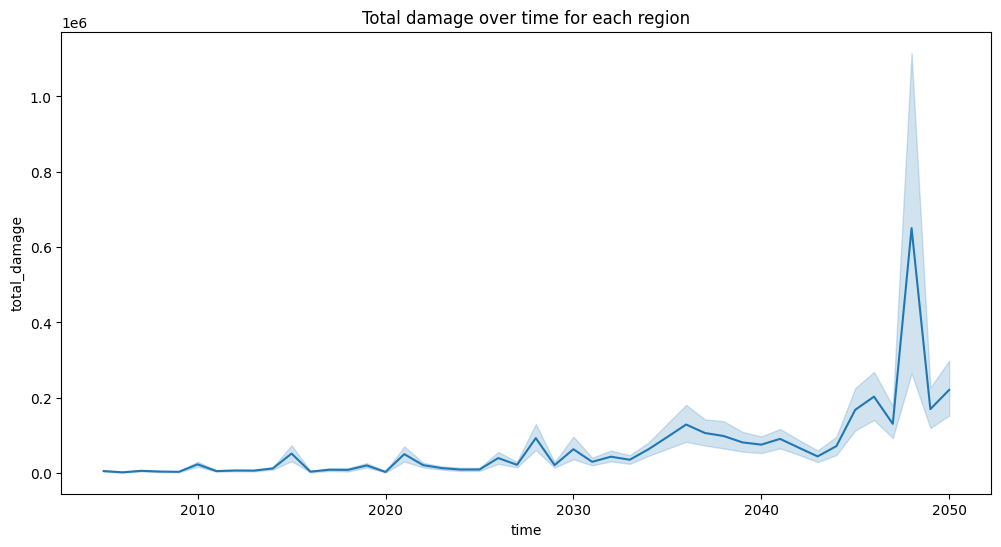

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))


#df_melted_grouped_region = df_melted.groupby(['time', 'REGIONS 35 I']).mean().reset_index()
sns.lineplot(data=df_melted, x='time', y='total_damage', legend=True, estimator='mean', ax=ax)

plt.title('Total damage over time for each region')
#ax.set_yscale('log')

plt.show()  

### Checking where and when the damages are the higher

This step serves to check irregularities in the experimental setup. 

<Axes: xlabel='time', ylabel='total_damage'>

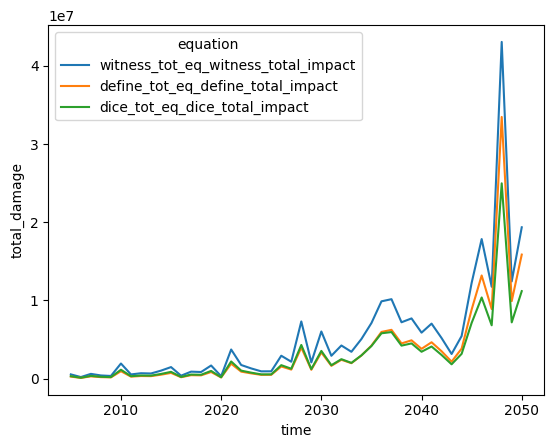

In [13]:
hd_country = df_melted.groupby(['time', 'total_radiative_forcing', 'equation']).sum().reset_index().sort_values(ascending=False, by='total_damage')

sns.lineplot(data=hd_country, x='time', y='total_damage', hue='equation', legend=True, estimator='mean')

In [14]:
# Drop infinite values
infinites = df_melted[(df_melted['total_damage'] == np.inf) | (df_melted['total_damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)

## Preparing the regression

### With all variables, on a global level

In [15]:
# Group by time, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()
df_regression = df_regression.drop( columns=['REGIONS 35 I'])

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression = df_regression.apply(pd.to_numeric, errors='coerce')
df_regression = df_regression.dropna()


df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,total_damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-0.404395,38261.788214,1.714491,27.049807,1.366150e+05,False,False
1,2005.0,-0.404395,38261.788214,1.714491,27.049807,1.650311e+05,True,False
2,2005.0,-0.404395,38261.788214,1.714491,27.049807,2.788501e+05,False,True
3,2005.0,0.673154,33719.963728,1.714491,27.049807,1.366150e+05,False,False
4,2005.0,0.673154,33719.963728,1.714491,27.049807,1.650311e+05,True,False
...,...,...,...,...,...,...,...,...
271,2050.0,-0.187013,29696.100321,3.804644,35.496480,5.598194e+06,True,False
272,2050.0,-0.187013,29696.100321,3.804644,35.496480,9.677728e+06,False,True
273,2050.0,0.649570,20269.153452,3.804644,35.496480,7.932872e+06,False,False
274,2050.0,0.649570,20269.153452,3.804644,35.496480,5.598194e+06,True,False


## Checking some hypothesis on the dataset

We want to check the colinearity of our variables. To do so, we compute the correleation matrix, which computes two by two the correlation between multiple variables. We then represent it in the shape of a heatamp.

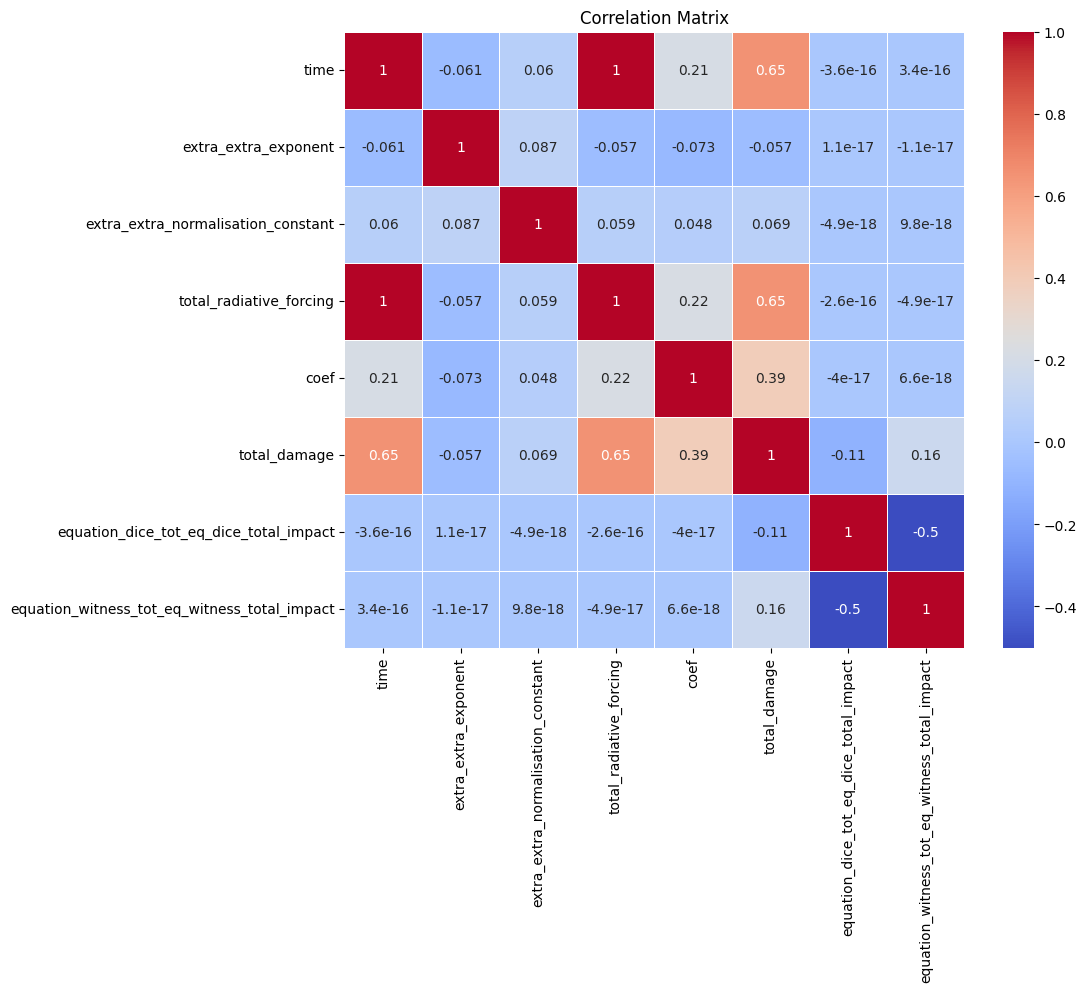

In [16]:
corr_matrix = df_regression.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We now want to visualize pair plots.

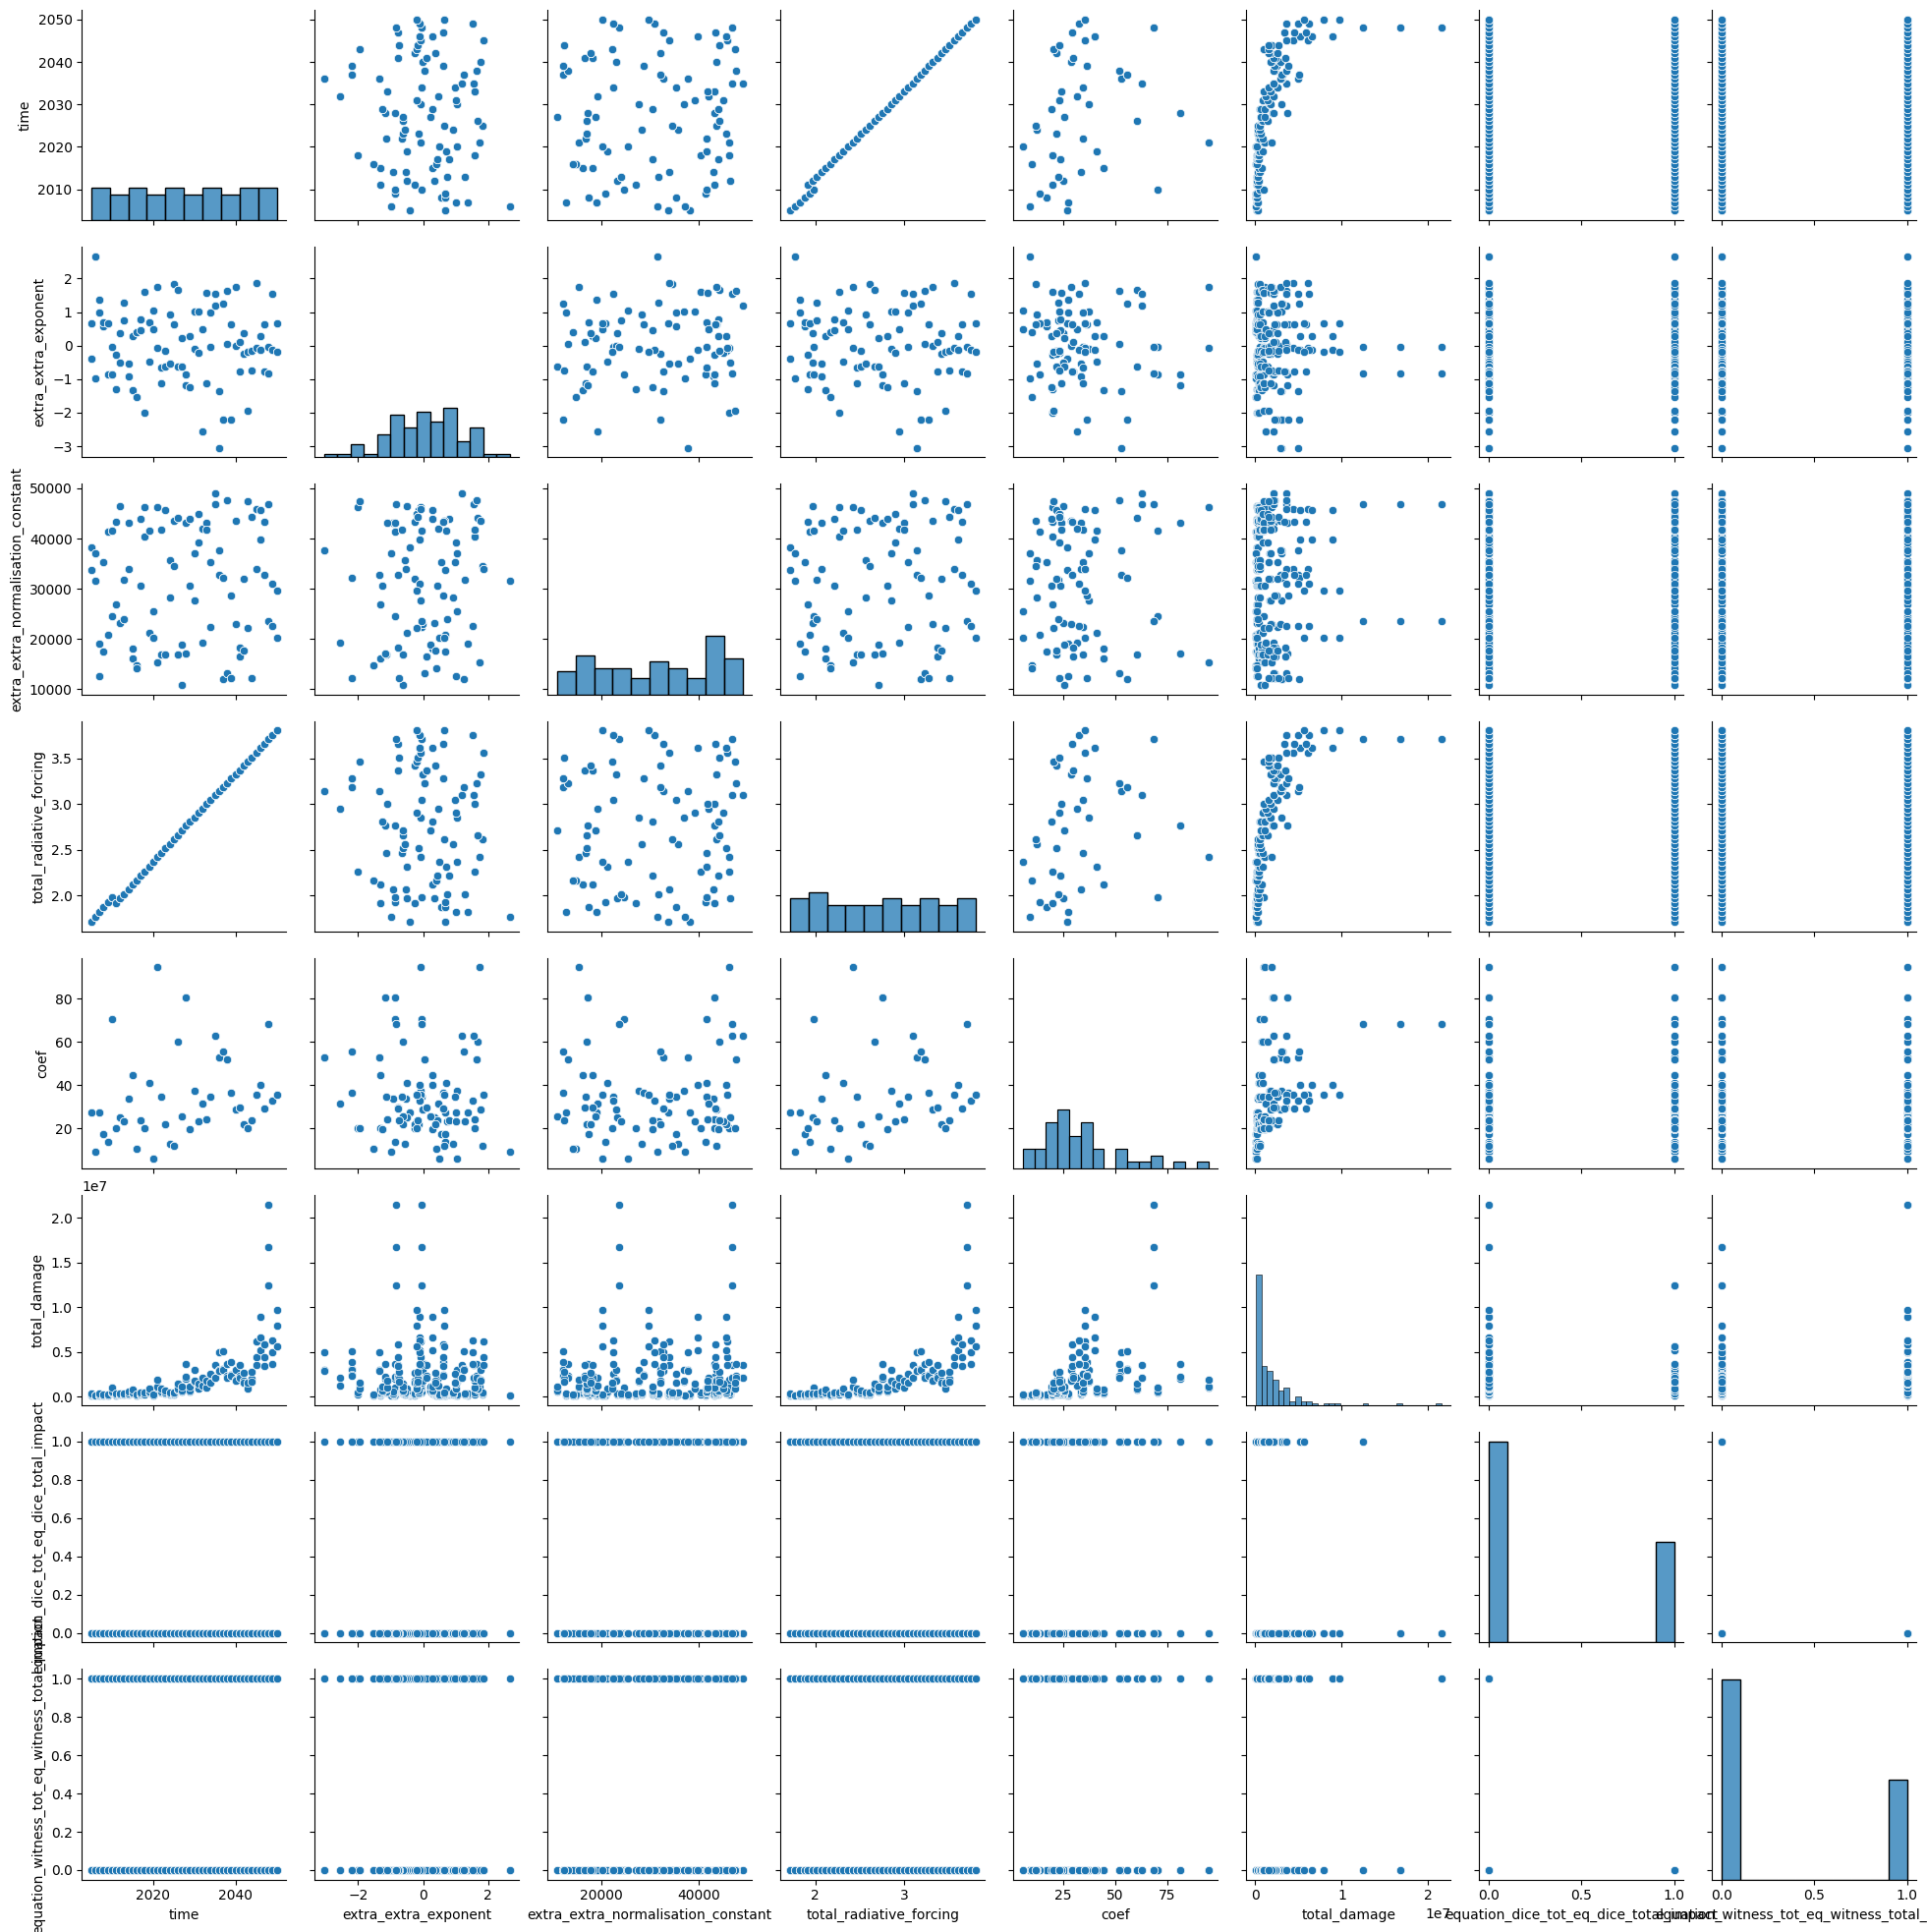

In [17]:
sns.pairplot(df_regression)

If we only do it with variables we have in the regressions : 

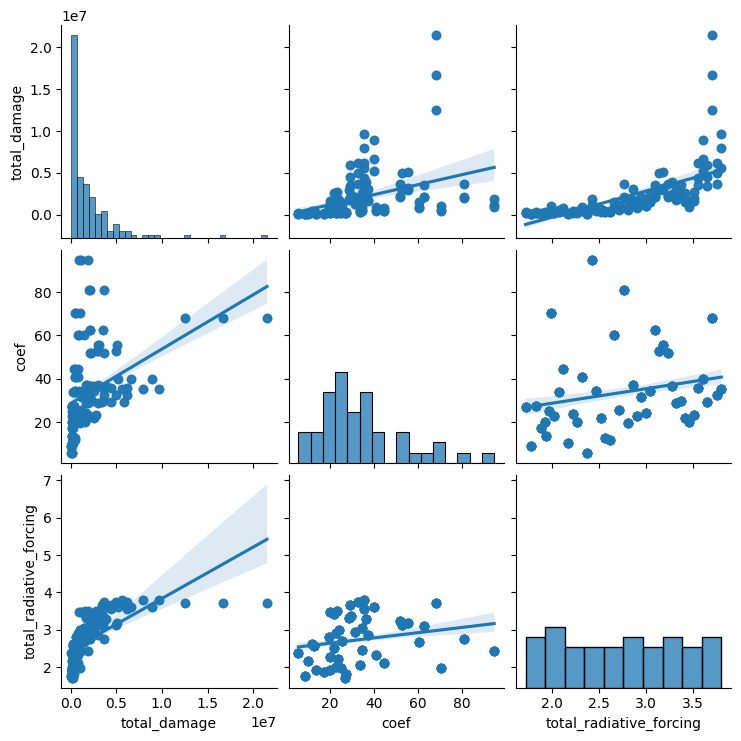

In [31]:
sns.pairplot(df_regression[['total_damage', 'coef', 'total_radiative_forcing']], kind='reg')

<Axes: xlabel='extra_extra_normalisation_constant', ylabel='total_damage'>

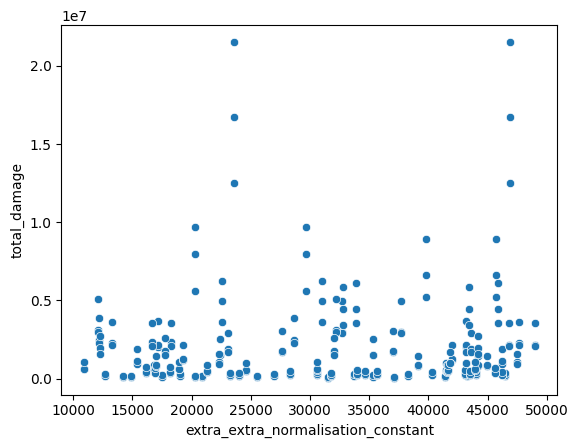

In [18]:
variable = 'extra_extra_normalisation_constant'

sns.scatterplot(data=df_regression, x=variable, y='total_damage')


## Doing the regression

### Without the equation dummies

In [24]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
#df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=False)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I', 'equation', 'coef'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     52.96
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           6.24e-33
Time:                        15:46:59   Log-Likelihood:                -4424.5
No. Observations:                 276   AIC:                             8859.
Df Residuals:                     271   BIC:                             8877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1.099e+09   4.98e+08      2.206      0.028    1.18e+08    2.08e+09
time                               -5.618e+05   2.53e+05     -2.220      0.027   -1.06e+06   -6.36e+04
extra_extra_exponent               -9.366e+04   1.25e+05     -0.752      0.453   -3.39e+05    1.52e+05
extra_extra_normalisation_constant     9.4718     11.841      0.800      0.424     -13.841      32.785
total_radiative_forcing             1.507e+07    5.4e+06      2.791      0.006    4.44e+06    2.57e+07
==============================================================================
Omnibus:                      276.547   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8092.019
Skew:                           4.155   Prob(JB):                         0.00
Kurtosis:                      28.191   Cond. No.                     1.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

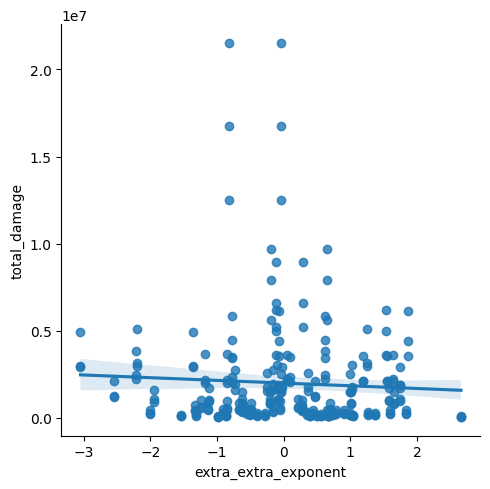

In [20]:
sns.lmplot(data=df_regression, x='extra_extra_exponent', y='total_damage')

### Without countries as dummy

In [25]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     41.89
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.26e-39
Time:                        15:47:49   Log-Likelihood:                -4402.2
No. Observations:                 276   AIC:                             8820.
Df Residuals:                     268   BIC:                             8849.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         8.611e+08   4.64e+08      1.856      0.065   -5.25e+07    1.77e+09
time                                         -4.411e+05   2.36e+05     -1.872      0.062   -9.05e+05    2.29e+04
extra_extra_exponent                         -4.307e+04   1.16e+05     -0.372      0.711   -2.71e+05    1.85e+05
extra_extra_normalisation_constant               6.5949     10.995      0.600      0.549     -15.052      28.242
total_radiative_forcing                       1.225e+07   5.03e+06      2.434      0.016    2.34e+06    2.22e+07
coef                                          3.859e+04   6735.989      5.730      0.000    2.53e+04    5.19e+04
equation_dice_tot_eq_dice_total_impact       -2.516e+05   3.06e+05     -0.822      0.412   -8.54e+05    3.51e+05
equation_witness_tot_eq_witness_total_impact  8.481e+05   3.06e+05      2.771      0.006    2.45e+05    1.45e+06
==============================================================================
Omnibus:                      266.915   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6789.928
Skew:                           3.988   Prob(JB):                         0.00
Kurtosis:                      25.952   Cond. No.                     1.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,REGIONS 35 I,coef,total_damage,equation_define_tot_eq_define_total_impact,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-0.404395,38261.788214,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,27.049807,1.366150e+05,True,False,False
1,2005.0,-0.404395,38261.788214,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,27.049807,1.650311e+05,False,True,False
2,2005.0,-0.404395,38261.788214,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,27.049807,2.788501e+05,False,False,True
3,2005.0,0.673154,33719.963728,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,27.049807,1.366150e+05,True,False,False
4,2005.0,0.673154,33719.963728,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,27.049807,1.650311e+05,False,True,False
...,...,...,...,...,...,...,...,...,...,...
271,2050.0,-0.187013,29696.100321,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,35.496480,5.598194e+06,False,True,False
272,2050.0,-0.187013,29696.100321,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,35.496480,9.677728e+06,False,False,True
273,2050.0,0.649570,20269.153452,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,35.496480,7.932872e+06,True,False,False
274,2050.0,0.649570,20269.153452,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,35.496480,5.598194e+06,False,True,False


### With countries as dummy

In [23]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation', 'REGIONS 35 I'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     52.15
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:46:36   Log-Likelihood:            -1.2394e+05
No. Observations:                8706   AIC:                         2.480e+05
Df Residuals:                    8664   BIC:                         2.483e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2.498e+07   1.45e+07      1.727      0.084   -3.37e+06    5.33e+07
time                                          -1.28e+04   7344.351     -1.743      0.081   -2.72e+04    1595.982
extra_extra_exponent                          1348.7849   3666.482      0.368      0.713   -5838.392    8535.962
extra_extra_normalisation_constant               0.2282      0.352      0.648      0.517      -0.462       0.918
total_radiative_forcing                       3.544e+05   1.57e+05      2.258      0.024    4.68e+04    6.62e+05
coef                                          8.353e+04   3316.329     25.188      0.000     7.7e+04       9e+04
equation_dice_tot_eq_dice_total_impact       -7976.8114   9696.795     -0.823      0.411    -2.7e+04     1.1e+04
equation_witness_tot_eq_witness_total_impact  2.689e+04   9696.795      2.773      0.006    7878.129    4.59e+04
REGIONS 35 I_BELGIUM                         -9.463e+04   3.69e+04     -2.564      0.010   -1.67e+05   -2.23e+04
REGIONS 35 I_BULGARIA                        -1.212e+05   3.73e+04     -3.251      0.001   -1.94e+05   -4.81e+04
REGIONS 35 I_CHINA                            5.756e+05   3.69e+04     15.579      0.000    5.03e+05    6.48e+05
REGIONS 35 I_CROATIA                         -1.184e+05    3.7e+04     -3.205      0.001   -1.91e+05    -4.6e+04
REGIONS 35 I_CYPRUS                          -1.214e+05    3.7e+04     -3.285      0.001   -1.94e+05    -4.9e+04
REGIONS 35 I_CZECH REPUBLIC                  -9.794e+04   3.69e+04     -2.655      0.008    -1.7e+05   -2.56e+04
REGIONS 35 I_DENMARK                         -1.008e+05   3.69e+04     -2.729      0.006   -1.73e+05   -2.84e+04
REGIONS 35 I_EASOC                            1.643e+05   3.69e+04      4.455      0.000     9.2e+04    2.37e+05
REGIONS 35 I_ESTONIA                         -1.052e+05   3.69e+04     -2.850      0.004   -1.77e+05   -3.28e+04
REGIONS 35 I_FINLAND                         -9.711e+04   3.69e+04     -2.632      0.008   -1.69e+05   -2.48e+04
REGIONS 35 I_FRANCE                          -5.974e+04   3.69e+04     -1.620      0.105   -1.32e+05    1.26e+04
REGIONS 35 I_GERMANY                          2.808e+04    3.7e+04      0.759      0.448   -4.44e+04    1.01e+05
REGIONS 35 I_GREECE                          -1.144e+05   3.69e+04     -3.096      0.002   -1.87e+05    -4.2e+04
REGIONS 35 I_HUNGARY                         -1.255e+05    3.7e+04     -3.393      0.001   -1.98e+05    -5.3e+04
REGIONS 35 I_INDIA                            -8.45e+04   3.84e+04     -2.199      0.028    -1.6e+05   -9180.882
REGIONS 35 I_IRELAND                         -1.025e+05   3.68e+04     -2.788      0.005   -1.75e+05   -3.04e+04
REGIONS 35 I_ITALY              